# KC House Pricing Project


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

## Exploring Data Frame and Cleaning Up Null Values

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Make Grade only Numeric

In [4]:
# Create a new dataframe using genres listed in my existing data frame. 
grade_df = df['grade'].str.split(' ', expand = True)
#Set the column names
grade_df.rename(columns = {0 : 'numerical_grade'}, inplace = True)
grade_df.drop([1 , 2], axis = 1, inplace = True)
grade_df
# Add the expanded columns back to the original df
df = df.merge(grade_df, right_index = True, left_index = True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,numerical_grade
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8


### Fill in null values with the null values associated to the column

In [5]:
df['waterfront'].fillna('NO', inplace=True)
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace = True)

### Replace View Column with numeric Values

In [6]:
view_map = {'EXCELLENT':5, 'GOOD':4, 'AVERAGE':3, 'FAIR':2, 'NONE':1, np.nan:0}
df['view_num'] = df['view'].map(view_map)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,numerical_grade,view_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,6,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8,1


### Create New Categorical Column for Good View

In [7]:
df['good_view'] = 0

df['good_view'].loc[df['view_num'] >= 3] = 1

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,numerical_grade,view_num,good_view
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,7,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,0.0,98028,47.7379,-122.233,2720,8062,6,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,7,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,8,1,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,8,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,7,1,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,2004,0.0,98027,47.5345,-122.069,1410,1287,8,1,0


### Add Zipcode Data

Data is from: https://www.point2homes.com/US/Neighborhood/WA/King-County-Demographics.html#MedianIncomeByZipcaode

In [9]:
df_income = pd.read_csv('data/kc_zipcode_data.csv')
df_income.head()

,ZipCode,Population,Number of Households,Median Income,Average Income
0,98001,"34,455","11,648","$88,962.00","$102,586.00"
1,98002,"33,947","13,162","$59,097.00","$70,945.00"
2,98003,"49,445","18,515","$59,560.00","$76,753.00"
3,98004,"37,265","17,460","$142,173.00","$210,129.00"
4,98005,"21,414","8,590","$135,225.00","$186,020.00"


In [10]:
# Rename zipcode to match existing datafram
df_income.rename(columns = {'ZipCode': 'zipcode'}, inplace=True) 
# Merge the dataframes together
df = df.merge(df_income, how = 'left', on = 'zipcode')

In [11]:
# Get rid of commas in our new data
df['Median Income']=df['Median Income'].str.replace(',','')
df['Average Income']=df['Average Income'].str.replace(',','')
df['Number of Households']=df['Number of Households'].str.replace(',','')
df['Population']=df['Population'].str.replace(',','')
df['Population']=df['Population'].str.replace(',','')

#Get rid of dollar signs in our new data
df['Median Income']=df['Median Income'].str.replace('$','')
df['Average Income']=df['Average Income'].str.replace('$','')


In [12]:
# Turn our new data into floats so we can use it for regression analysis
df['Median Income'] = df['Median Income'].astype('float64')
df['Average Income'] = df['Average Income'].astype('float64')
df['Number of Households'] = df['Number of Households'].astype('float64')
df['Population'] = df['Population'].astype('float64')

In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,numerical_grade,view_num,good_view,Population,Number of Households,Median Income,Average Income
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,-122.257,1340,5650,7,1,0,26507.0,9760.0,84820.0,111015.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,-122.319,1690,7639,7,1,0,44030.0,19643.0,78263.0,103336.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,-122.233,2720,8062,6,1,0,22953.0,9296.0,115093.0,138209.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,-122.393,1360,5000,7,1,0,17083.0,7855.0,123042.0,147330.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,-122.045,1800,7503,8,1,0,29349.0,9567.0,196146.0,225217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,-122.346,1530,1509,8,1,0,54194.0,26314.0,105480.0,134281.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,-122.362,1830,7200,8,1,0,27622.0,10336.0,80633.0,98981.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,-122.299,1020,2007,7,1,0,33175.0,14263.0,87098.0,135912.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,-122.069,1410,1287,8,1,0,30240.0,12074.0,121620.0,158050.0


## Using One Hot Encoder for Waterfront Collumn

In [14]:
# creating instance of one-hot-encoder
# Do after train test split
enc = OneHotEncoder(handle_unknown='error', drop = 'first')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['waterfront']]).toarray())
enc_df
# merge with main df bridge_df on key values
df = df.merge(enc_df, right_index = True, left_index = True)

In [15]:
df.rename(columns={0: "Waterfront"}, inplace = True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,numerical_grade,view_num,good_view,Population,Number of Households,Median Income,Average Income,Waterfront
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1340,5650,7,1,0,26507.0,9760.0,84820.0,111015.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1690,7639,7,1,0,44030.0,19643.0,78263.0,103336.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,2720,8062,6,1,0,22953.0,9296.0,115093.0,138209.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1360,5000,7,1,0,17083.0,7855.0,123042.0,147330.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1800,7503,8,1,0,29349.0,9567.0,196146.0,225217.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,1509,8,1,0,54194.0,26314.0,105480.0,134281.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,1830,7200,8,1,0,27622.0,10336.0,80633.0,98981.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,2007,7,1,0,33175.0,14263.0,87098.0,135912.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1410,1287,8,1,0,30240.0,12074.0,121620.0,158050.0,0.0


## Creating a Renovated Category

In [16]:
df['renovated'] = 0
df['renovated'].loc[df['yr_renovated'] >df['yr_built']] = 1
df

C:\Users\Johnn\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,numerical_grade,view_num,good_view,Population,Number of Households,Median Income,Average Income,Waterfront,renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,5650,7,1,0,26507.0,9760.0,84820.0,111015.0,0.0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7639,7,1,0,44030.0,19643.0,78263.0,103336.0,0.0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,8062,6,1,0,22953.0,9296.0,115093.0,138209.0,0.0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,5000,7,1,0,17083.0,7855.0,123042.0,147330.0,0.0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,7503,8,1,0,29349.0,9567.0,196146.0,225217.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1509,8,1,0,54194.0,26314.0,105480.0,134281.0,0.0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,7200,8,1,0,27622.0,10336.0,80633.0,98981.0,0.0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2007,7,1,0,33175.0,14263.0,87098.0,135912.0,0.0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,1287,8,1,0,30240.0,12074.0,121620.0,158050.0,0.0,0


## Create a Dataframe with Only numeric columns

In [17]:
df.drop(['sqft_basement', 'view', 'condition', 'date', 'id', 'grade', 'waterfront'], axis = 1, inplace = True )
df['numerical_grade'] = df['numerical_grade'].astype('float64')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 21597 non-null  float64
 1   bedrooms              21597 non-null  int64  
 2   bathrooms             21597 non-null  float64
 3   sqft_living           21597 non-null  int64  
 4   sqft_lot              21597 non-null  int64  
 5   floors                21597 non-null  float64
 6   sqft_above            21597 non-null  int64  
 7   yr_built              21597 non-null  int64  
 8   yr_renovated          21597 non-null  float64
 9   zipcode               21597 non-null  int64  
 10  lat                   21597 non-null  float64
 11  long                  21597 non-null  float64
 12  sqft_living15         21597 non-null  int64  
 13  sqft_lot15            21597 non-null  int64  
 14  numerical_grade       21597 non-null  float64
 15  view_num           

## Creating a Heat Chart to Judge Correlation

<AxesSubplot:>

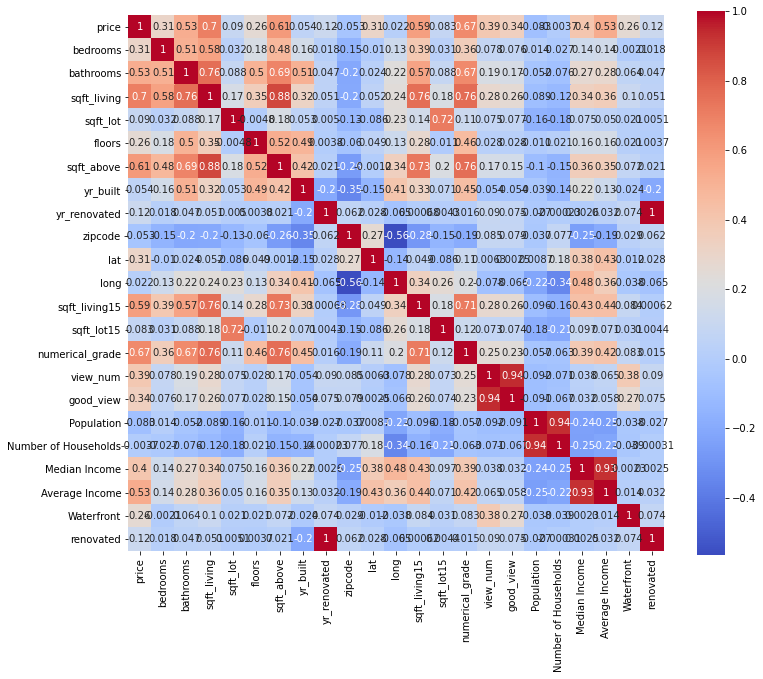

In [19]:
plt.figure(figsize = (12, 10))

sns.heatmap(df.corr(), cmap="coolwarm", annot = True, square = True)

## Examining Linearity of Potential X Variables


In [20]:
y = df['price']
X = df.drop(columns=['price'], axis=1)


In [21]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'numerical_grade', 'view_num',
       'good_view', 'Population', 'Number of Households', 'Median Income',
       'Average Income', 'Waterfront', 'renovated'],
      dtype='object')

In [22]:
df.rename(columns={"Number of Households": 'number_of_households', 'Median Income': 'median_income'
                   , 'Average Income': 'average_income'}, inplace = True)


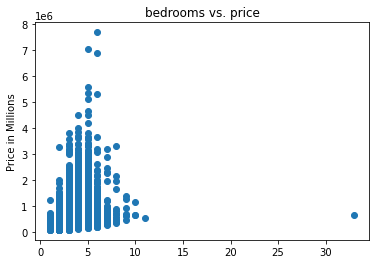

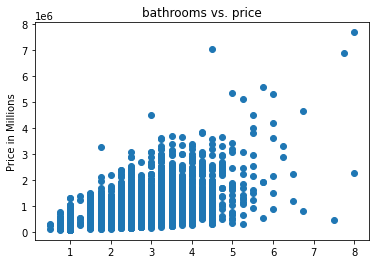

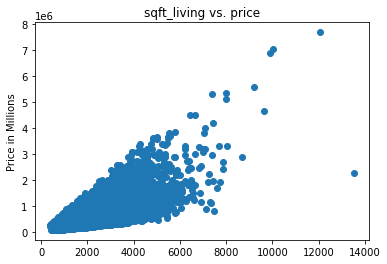

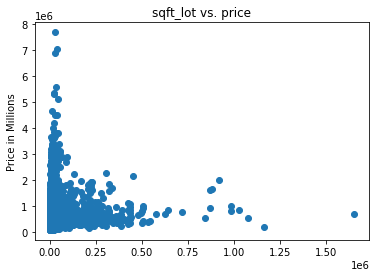

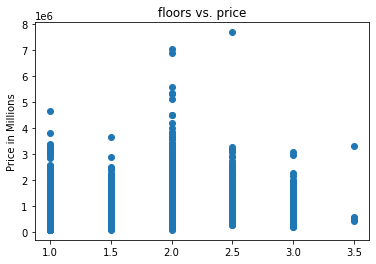

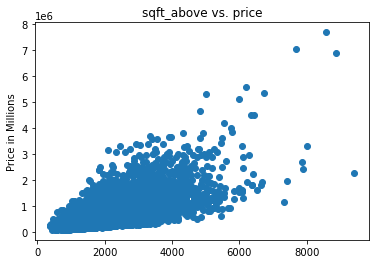

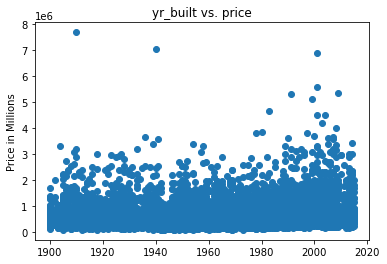

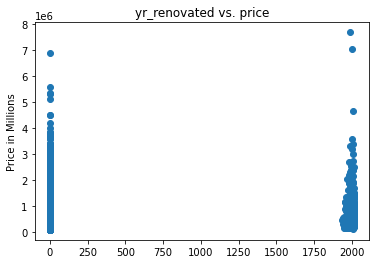

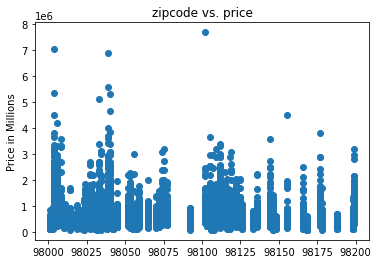

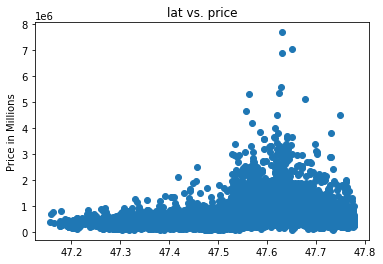

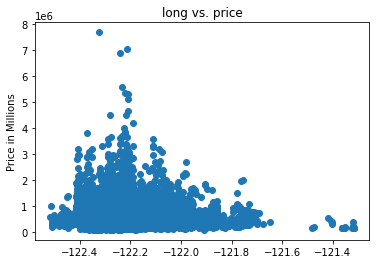

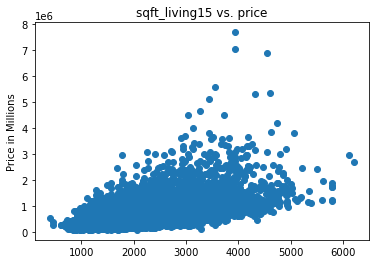

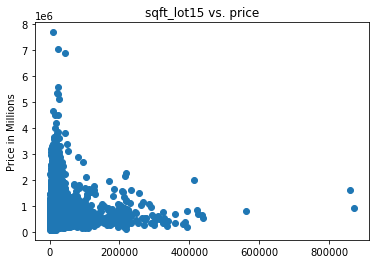

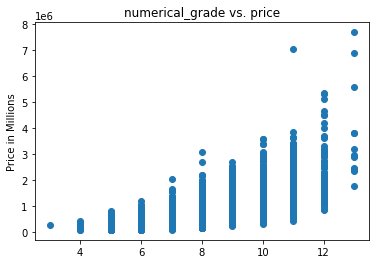

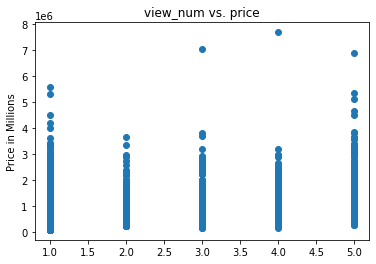

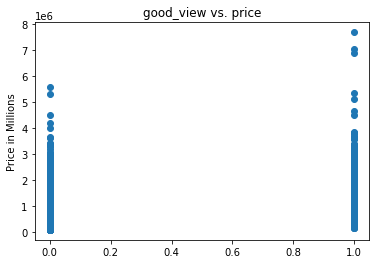

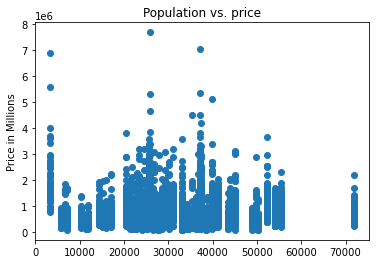

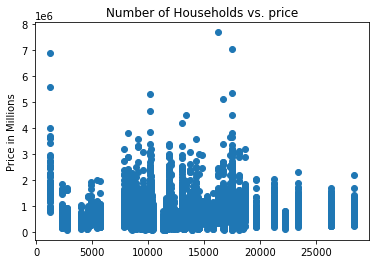

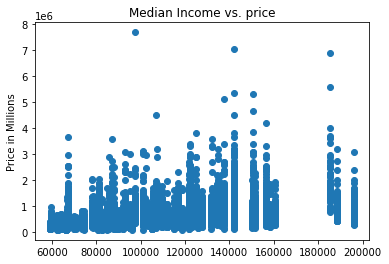

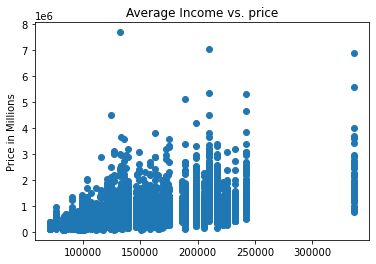

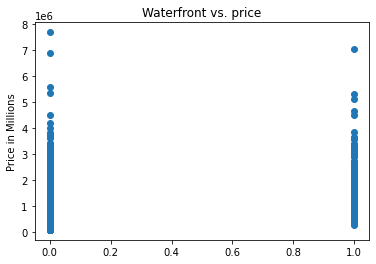

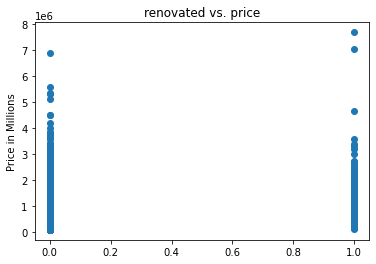

In [23]:
for col in X.columns:
    plt.scatter(X[col], y)
    plt.title(f"{col} vs. price")
    plt.ylabel("Price in Millions")
    plt.show()

## Examine the Price Distribution

It's important to examine the distribution of price because to see if it is skewed or their is a large tail. This will have an impact on our regressions that we may need to address when building our final model.

<AxesSubplot:xlabel='price', ylabel='Count'>

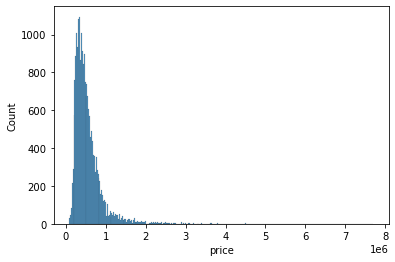

In [24]:
sns.histplot(df['price'])

It appears that their is large right tail for our price model that we may want to address in our final model.

## Reserve some data for model validation

In [25]:
y = df['price']
X = df.drop(columns=['price'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.2,
                                                    random_state=42
)


## Modelless Base

With no model we would use the price mean of our training data to predict the price of our testing data.  

In [26]:
train_target_mean = y_train.mean()

baseline_train_preds = [train_target_mean] * len(y_train)
baseline_test_preds = [train_target_mean] * len(y_test)

# R squared
print('Model fit for training data')
print(f"R2: {metrics.r2_score(y_train, baseline_train_preds):.2f}")
# Mean squared error
print(f"Mean Square Error: {metrics.mean_squared_error(y_train, baseline_train_preds, squared=False):,.0f}")
# Mean absolute error
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_train, baseline_train_preds):,.0f}")
print("\n")

# R squared
print('Model fit for test data')
print(f"R2: {metrics.r2_score(y_test, baseline_test_preds):.2f}")
# Mean squared error
print(f"Mean Square Error: {metrics.mean_squared_error(y_test, baseline_test_preds, squared=False):,.0f}")
# Mean absolute error
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, baseline_test_preds):,.0f}")

Model fit for training data
R2: 0.00
Mean Square Error: 368,958
Mean Absolute Error: 235,058


Model fit for test data
R2: -0.00
Mean Square Error: 360,907
Mean Absolute Error: 231,542


## Base Model with Just Living Square Foot

In [27]:
def model(ind_variable, data):
    formula = 'price ~ ' + ' + '.join(ind_variable)
    multi_model = ols(formula, data).fit()
    multi_model_summ = multi_model.summary()
    return multi_model,multi_model_summ

In [28]:
def assess(model):
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train
    y_te = y_test
# Format the string output using f-strings    
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    
# Set Variables for graphing    
    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
# Graph Syntax   
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

In [29]:
def scaled_model(ind_variable, data):
    formula = 'price ~ ' + ' + '.join(ind_variable)
    data_scaled = (data - np.mean(data)) / np.std(data)
    model_scaled = ols(formula, data_scaled).fit()
    model_scaled_summ = model_scaled.summary()
    return model_scaled_summ

In [30]:
def model_and_assess(ind_variable, data):
    multi_model, multi_model_summ = model(ind_variable,data)
    assessment = assess(multi_model)
    scaled_summ = scaled_model(ind_variable,data)
    qq = sm.graphics.qqplot(multi_model.resid, dist=stats.norm, line='45', fit=True)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)   
    print('        ')
    print('This is the summary of the scaled model')
    print('        ')
    print(scaled_summ)        
    print('        ')
    print('This is the correlation table between variables')
    print('        ')
    print(data[ind_variable].corr())    
    print('        ')
    print('This is the residual plot and qq plot')
    print('        ')
    print(assessment)
    print(qq)

Train R2: 0.49248102591707765
Test R2: 0.4934364209286596
----
Train RMSE: 262847.0640099154
Test RMSE: 256832.28945676202
----
Train MAE: 174592.15379749413
Test MAE: 170756.35511471998
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:29:43   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust              

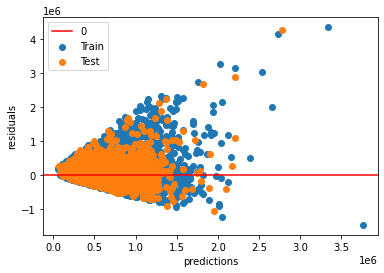

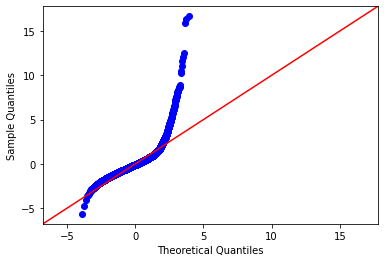

In [31]:
model_and_assess(['sqft_living'],df)

## Adding additional features to our Model based on Correlation Scores

Train R2: 0.611810655421914
Test R2: 0.6120897235946879
----
Train RMSE: 229878.7324419146
Test RMSE: 224749.2674320919
----
Train MAE: 149374.77828280875
Test MAE: 147593.1951313988
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     6808.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:29:44   Log-Likelihood:            -2.9717e+05
No. Observations:               21597   AIC:                         5.944e+05
Df Residuals:                   21591   BIC:                         5.944e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                  

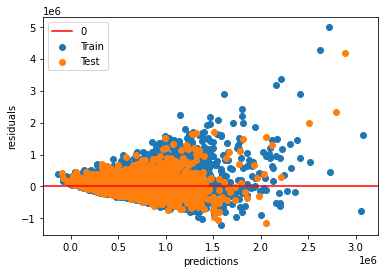

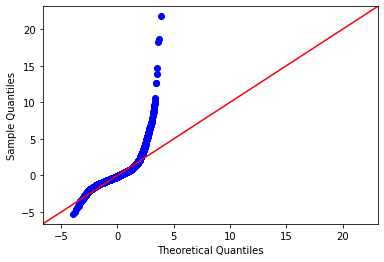

In [32]:
model_and_assess(['sqft_living', 'median_income', 'numerical_grade', 'view_num', 'Waterfront'],df)

In [33]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='error')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['numerical_grade']]).toarray())
enc_df
# merge with main df bridge_df on key values
df = df.merge(enc_df, right_index = True, left_index = True)
list(enc.get_feature_names())

['x0_3.0',
 'x0_4.0',
 'x0_5.0',
 'x0_6.0',
 'x0_7.0',
 'x0_8.0',
 'x0_9.0',
 'x0_10.0',
 'x0_11.0',
 'x0_12.0',
 'x0_13.0']

In [34]:
df.columns

Index([               'price',             'bedrooms',            'bathrooms',
                'sqft_living',             'sqft_lot',               'floors',
                 'sqft_above',             'yr_built',         'yr_renovated',
                    'zipcode',                  'lat',                 'long',
              'sqft_living15',           'sqft_lot15',      'numerical_grade',
                   'view_num',            'good_view',           'Population',
       'number_of_households',        'median_income',       'average_income',
                 'Waterfront',            'renovated',                      0,
                            1,                      2,                      3,
                            4,                      5,                      6,
                            7,                      8,                      9,
                           10],
      dtype='object')

In [35]:
# Rename the new columns for easier interpretability

df.rename(columns={0: 'grade_3', 1: 'grade_4', 2: 'grade_5', 3: 'grade_6', 4: 'grade_7', 5: 'grade_8',
                   6: 'grade_9', 7: 'grade_10', 8: 'grade_11', 9: 'grade_12', 10: 'grade_13'
                  }, inplace = True)


### The modified log data improved our model's predictive capabilities but still has correlation between two of our variables. However we can engineer some new variables to:
#### Reduce Collinearity
#### Improve our accuracy.

In [36]:
pf = PolynomialFeatures(degree=2)

X = df.drop('price', axis=1)
y = df['price']

# Fitting the PolynomialFeatures object
pf.fit(X)

PolynomialFeatures()

In [37]:
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())


In [38]:
pdf_withprice = pd.concat([pdf, df['price']], axis = 1)

In [39]:
pdf_corr = pdf_withprice.corr()['price']

In [40]:
# Full list of correlations between price
dict(pdf_corr.sort_values(ascending = False))

{'price': 1.0,
 'x2 x19': 0.7797523491601319,
 'x2 x13': 0.756247815607081,
 'x2^2': 0.7273170199805493,
 'x2 x11': 0.7130607126968417,
 'x2 x18': 0.7116857330390178,
 'x1 x2': 0.7074258906096054,
 'x5 x19': 0.7053158418207705,
 'x2 x9': 0.7038765944413058,
 'x2 x8': 0.7019945123360681,
 'x2': 0.7019173021377597,
 'x2 x5': 0.6979623486368158,
 'x2 x6': 0.6956569932571173,
 'x13^2': 0.6925389614808879,
 'x13 x19': 0.6900272836409237,
 'x1 x19': 0.6866214346994899,
 'x5 x13': 0.6771378527411483,
 'x9 x13': 0.6724176861162806,
 'x11 x19': 0.6681804465057137,
 'x8 x13': 0.6681778631226164,
 'x13': 0.6679507713877846,
 'x11 x13': 0.6669410857932685,
 'x1 x5': 0.6611187294587092,
 'x1 x11': 0.6590713717349391,
 'x1 x13': 0.6557747026099011,
 'x5 x11': 0.6492890170754392,
 'x6 x13': 0.6433883865194727,
 'x0 x2': 0.6378743770429772,
 'x2 x14': 0.6377876121743585,
 'x5^2': 0.6329048612034921,
 'x5 x14': 0.6318815508618809,
 'x2 x4': 0.6318652053610183,
 'x5 x18': 0.6307048237238319,
 'x5 x9': 0

In [41]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'numerical_grade', 'view_num',
       'good_view', 'Population', 'number_of_households', 'median_income',
       'average_income', 'Waterfront', 'renovated', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [42]:
pf = PolynomialFeatures(degree=2)

X = df.drop('price', axis=1)
y = df['price']

# Fitting the PolynomialFeatures object
pf.fit(X)

PolynomialFeatures()

In [43]:
pdf_withprice = pd.concat([pdf, df['price']], axis = 1)

### From the correlation list we can construct new predictive columns

##### We want to make sure we only select columns one time each to avoid collinearity issues within our model

In [44]:
df['sqft_living_times_median_income'] = df['median_income'] * df['sqft_living']
df['bathrooms_times_sqft_above'] = df['bathrooms'] * df['sqft_above']
df['long_times_numerical_grade'] = df['long'] * df['numerical_grade']
#speculative add
df['sqft_living_times_median_income'] = df['view_num'] * df['sqft_living']
df['grade_times_sqft_living'] = df['sqft_living'] * df['numerical_grade']

### Reset Instance of Train Test Split

In [45]:
y = df['price']
X = df.drop(columns=['price'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.2,
                                                    random_state=42
)


Train R2: 0.6579508928418821
Test R2: 0.6320766773376292
----
Train RMSE: 215784.983697498
Test RMSE: 218882.63166376975
----
Train MAE: 140456.2658171113
Test MAE: 139838.85552357975
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2901.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:30:11   Log-Likelihood:            -2.9596e+05
No. Observations:               21597   AIC:                         5.920e+05
Df Residuals:                   21582   BIC:                         5.921e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                 

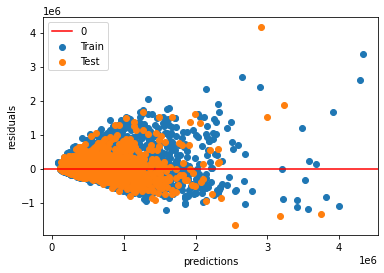

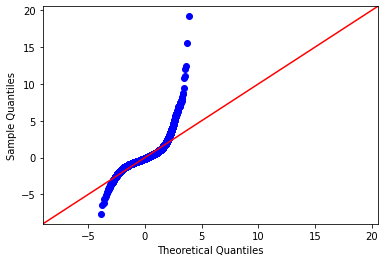

In [46]:
model_and_assess(['sqft_living', 'median_income','view_num', 'Waterfront',
                     'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
                     'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 
                     'grade_13'], df)

Train R2: 0.589100809670599
Test R2: 0.5877910732162007
----
Train RMSE: 236507.34423297207
Test RMSE: 231681.49057558467
----
Train MAE: 156001.6094975567
Test MAE: 152993.3788412058
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                 1.031e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:30:12   Log-Likelihood:            -2.9779e+05
No. Observations:               21597   AIC:                         5.956e+05
Df Residuals:                   21593   BIC:                         5.956e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                 

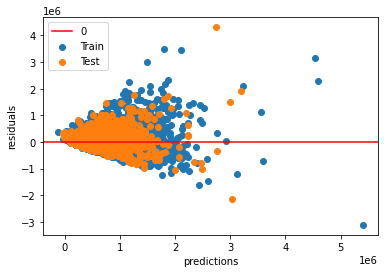

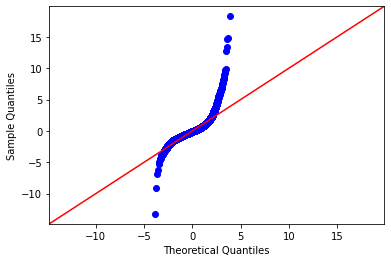

In [47]:
model_and_assess(['sqft_living_times_median_income', 'bathrooms_times_sqft_above',
                 'long_times_numerical_grade'], df)

Train R2: 0.7020826026817109
Test R2: 0.6745321834053045
----
Train RMSE: 201383.98072491345
Test RMSE: 205866.96766016827
----
Train MAE: 127537.7141849933
Test MAE: 126660.88941980782
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     3306.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:30:14   Log-Likelihood:            -2.9451e+05
No. Observations:               21597   AIC:                         5.890e+05
Df Residuals:                   21581   BIC:                         5.892e+05
Df Model:                          15                                         
Covariance Type:            nonrobust               

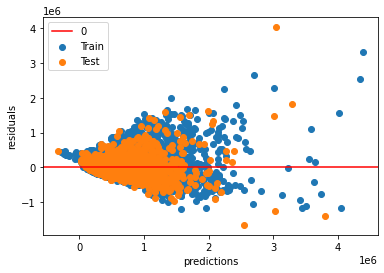

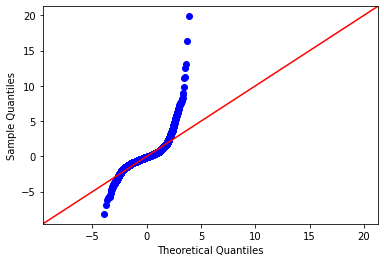

In [48]:
model_and_assess(['sqft_living', 'median_income','view_num', 'Waterfront',
                     'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
                     'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 
                     'grade_13', 'long'], df)

Train R2: 0.7050497438102543
Test R2: 0.6790104250241502
----
Train RMSE: 200378.61823889197
Test RMSE: 204445.75908670167
----
Train MAE: 126794.62373699642
Test MAE: 126367.08609999467
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3148.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:30:15   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21580   BIC:                         5.889e+05
Df Model:                          16                                         
Covariance Type:            nonrobust              

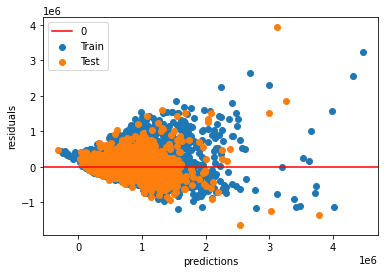

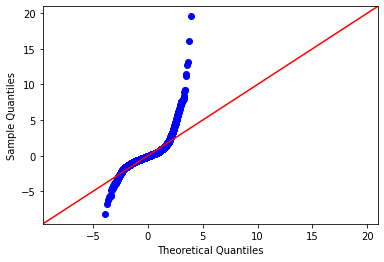

In [49]:
model_and_assess(['sqft_living', 'median_income','view_num', 'Waterfront',
                     'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
                     'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 
                     'grade_13', 'long', 'renovated'], df)

Train R2: 0.7050497438102543
Test R2: 0.6790104250241502
----
Train RMSE: 200378.61823889197
Test RMSE: 204445.75908670167
----
Train MAE: 126794.62373699642
Test MAE: 126367.08609999467
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3148.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        01:30:50   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21580   BIC:                         5.889e+05
Df Model:                          16                                         
Covariance Type:            nonrobust              

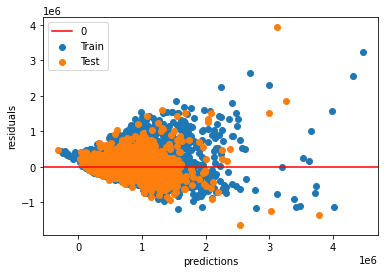

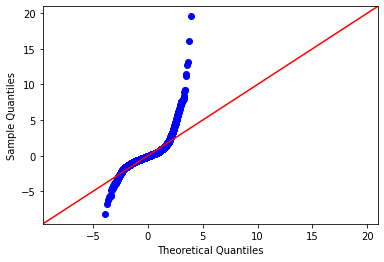

In [50]:
model_and_assess(['sqft_living', 'median_income','view_num', 'Waterfront',
                     'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
                     'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 
                     'grade_13', 'long', 'renovated'], df)

In [73]:
grade_df = pd.read_csv('data/grade_values_final_model.csv')

In [74]:
grade_df

,grade,regression_coefficient,change_from_previous_grade
0,3,-6507000,0
1,4,-6737000,-230000
2,5,-6752000,-15000
3,6,-6757000,-5000
4,7,-6740000,17000
5,8,-6706000,34000
6,9,-6606000,100000
7,10,-6461000,145000
8,11,-6207000,254000
9,12,-5740000,467000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            21597 non-null  float64
 1   bedrooms                         21597 non-null  int64  
 2   bathrooms                        21597 non-null  float64
 3   sqft_living                      21597 non-null  int64  
 4   sqft_lot                         21597 non-null  int64  
 5   floors                           21597 non-null  float64
 6   sqft_above                       21597 non-null  int64  
 7   yr_built                         21597 non-null  int64  
 8   yr_renovated                     21597 non-null  float64
 9   zipcode                          21597 non-null  int64  
 10  lat                              21597 non-null  float64
 11  long                             21597 non-null  float64
 12  sqft_living15     

In [77]:
grade_df.astype('int64')

,grade,regression_coefficient,change_from_previous_grade
0,3,-6507000,0
1,4,-6737000,-230000
2,5,-6752000,-15000
3,6,-6757000,-5000
4,7,-6740000,17000
5,8,-6706000,34000
6,9,-6606000,100000
7,10,-6461000,145000
8,11,-6207000,254000
9,12,-5740000,467000


In [81]:
grade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   grade                       11 non-null     int64
 1   regression_coefficient      11 non-null     int64
 2   change_from_previous_grade  11 non-null     int64
dtypes: int64(3)
memory usage: 392.0 bytes


In [83]:
grade_df['change_from_3'] = (grade_df['regression_coefficient'] - -6737000)
grade_df

,grade,regression_coefficient,change_from_previous_grade,change_from_3
0,3,-6507000,0,0
1,4,-6737000,-230000,-230000
2,5,-6752000,-15000,-245000
3,6,-6757000,-5000,-250000
4,7,-6740000,17000,-233000
5,8,-6706000,34000,-199000
6,9,-6606000,100000,-99000
7,10,-6461000,145000,46000
8,11,-6207000,254000,300000
9,12,-5740000,467000,767000


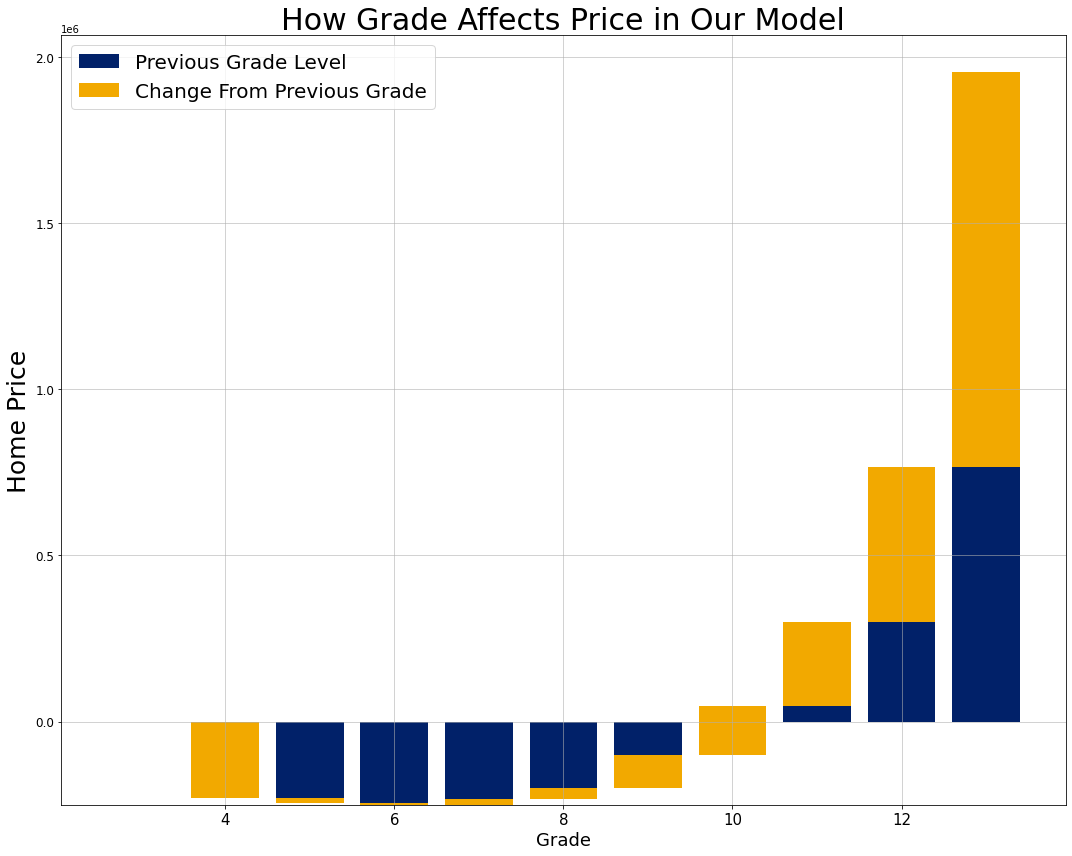

In [98]:
fig, ax = plt.subplots(figsize=(15, 12))

ax.bar(grade_df['grade'], grade_df['change_from_3'], color = '#012169', label = 'Previous Grade Level')
ax.bar(grade_df['grade'], grade_df['change_from_previous_grade'], 
       bottom = (grade_df['change_from_3'] -grade_df['change_from_previous_grade'])
                 ,color = '#F2A900', label = 'Change From Previous Grade')

plt.legend(loc="upper left", fontsize = 20)
ax.set_title('How Grade Affects Price in Our Model', fontsize = 30)
ax.set_xlabel('Grade', fontsize = 18)
ax.set_ylabel('Home Price', fontsize = 25)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.grid(which = 'major', alpha = .7)


plt.tight_layout()

# -------------------------------------------------------------------
# End of Notebook For Now Rest of Notebook is Speculative For Now

## We noticed earlier that our price distribution had a large right tail, so it may be useful for us to apply a logarithmic transformation in order to address this issue. 

In [ ]:
# Create a new dataframe of the log values of training price data
y_train_log=np.log(y_train)
# Add the log price and our independent variables to create a new dataframe
df_log_train=pd.concat([y_train_log,X_train],axis=1)

# Do the same for our test data
y_test_log=np.log(y_test)
df_log_test=pd.concat([y_test_log,X_test],axis=1)


## Modify our functions to evaluate the new log data

In [ ]:
def assess_log(model):
    
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train_log
    y_te = y_test_log
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

In [ ]:
def model_and_assess_log(ind_variable,data):
    multi_model, multi_model_summ = model(ind_variable,data)
    assessment = assess_log(multi_model)
    scaled_summ = scaled_model(ind_variable,data)
    qq = sm.graphics.qqplot(multi_model.resid, dist=stats.norm, line='45', fit=True)
    print('\n')
    print('This is the summary of the model')
    print('\n')
    print(multi_model_summ)
    print('\n')
    print('This is the summary of the scaled model')
    print('\n')
    print(scaled_summ)
    print('\n')
    print('This is the correlation table between variables')
    print('\n')
    print(data[ind_variable].corr())
    print('\n')
    print('This is the residual plot and qq plot')
    print('\n')
    print(assessment)
    print(qq)

In [ ]:
model_and_assess_log(['sqft_living', 'median_income','view_num', 'Waterfront',
                     'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
                     'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 
                     'grade_13', 'long'], df)

In [ ]:
model_and_assess_log(['sqft_living', 'median_income',  'view_num', 'Waterfront',
                     'numerical_grade'], df_log_train)

### The modified log data improved our model's predictive capabilities but still has correlation between two of our variables. However we can engineer some new variables to:
#### Reduce Collinearity
#### Improve our accuracy.

## Change the Grade to Be Categorical using One Hot Encoder

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='error')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df[['numerical_grade']]).toarray())
enc_df
# merge with main df bridge_df on key values
df = df.merge(enc_df, right_index = True, left_index = True)
list(enc.get_feature_names())

In [ ]:
df.columns

In [ ]:
df.columns

In [ ]:
# Rename the new columns for easier interpretability

df.rename(columns={0: 'grade_3', 1: 'grade_4', 2: 'grade_5', 3: 'grade_6', 4: 'grade_7', 5: 'grade_8',
                   6: 'grade_9', 7: 'grade_10', 8: 'grade_11', 9: 'grade_12', 10: 'grade_13'
                  }, inplace = True)


### Reset Instance of Train Test Split

In [ ]:
y = df['price']
X = df.drop(columns=['price'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.2,
                                                    random_state=42
)


In [ ]:
df

In [ ]:
model_and_assess(['sqft_living', 'median_income','view_num', 'Waterfront',
                     'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
                     'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 
                     'grade_13'], df)

In [ ]:
df.columns

In [ ]:
df['numerical_grade'].unique()